In [1]:
!pip install torch torchvision
!pip install git+https://github.com/openai/CLIP.git
!pip install Pillow
!pip install googletrans==3.1.0a0

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-28w3nlug
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-28w3nlug
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.4 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369489 sha256=ae9bacd45302a2f0f7e501ed3df744bbf3fbf6f6a130257af22e649cab08e5ec
  Stored in directory: /tmp/pip-ephem-wheel-cache-y6csmyov/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [ ]:
from google.colab import drive
import torch
import clip
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from googletrans import Translator

drive.mount('/content/drive')

Digite a frase para comparação (em português): Preciso comprar u abacate
Texto traduzido para inglês: I need to buy an avocado
A imagem mais relevante é: /content/drive/MyDrive/ATV_GC/abacate.jpg com similaridade de 27.92%


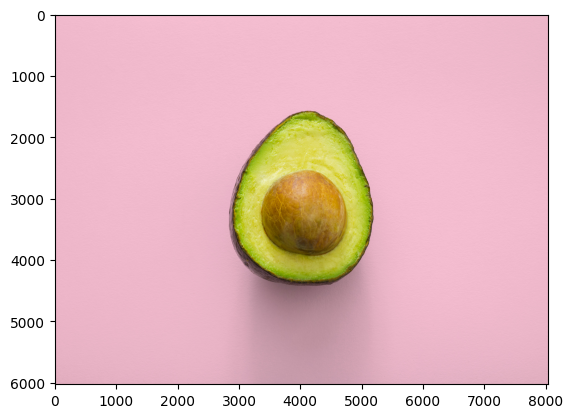

In [6]:
dispositivo = "cpu"  # string para processador

#carrega CLIP e o pré-processamento
modelo, pre_processamento = clip.load("ViT-B/32", device=dispositivo)

imagens = "/content/drive/MyDrive/ATV_GC"

#procura imagens jpg ou png
arquivos_imagem = [f for f in os.listdir(imagens) if f.endswith('.jpg') or f.endswith('.png')]

tradutor = Translator()  # Inicia uma instância do tradutor

entrada_texto = input("Digite a frase para comparação (em português): ")

#tradução portugues ingles
texto_traduzido = tradutor.translate(entrada_texto, src='pt', dest='en').text
print(f"Texto traduzido para inglês: {texto_traduzido}")

#transforma o texto traduzido em tokens
tokens_texto = clip.tokenize([texto_traduzido]).to(dispositivo)

max_sim = -1  #similaridade máxima, inicia em -1 para garantir que o primeiro valor seja maior
best_img = None

with torch.no_grad():  #separa as características do texto sem calcular o gradiente
    text_features = modelo.encode_text(tokens_texto)
    text_features /= text_features.norm(dim=-1, keepdim=True)  # Normalização

#loop pelas imagens
for arquivo_imagem in arquivos_imagem:

    img_path = os.path.join(imagens, arquivo_imagem)

    #abre a imagem e faz o pré-processamento, adiciona uma dimensão com unsqueeze e envia para o processador
    imagem = pre_processamento(Image.open(img_path)).unsqueeze(0).to(dispositivo)

    with torch.no_grad():  #da mesma maneira que o texto, separa as características da imagem
        img_features = modelo.encode_image(imagem)
        img_features /= img_features.norm(dim=-1, keepdim=True)  #normaliza as características da imagem

        #cálculo da similaridade entre o texto e as imagens usando a distância de cossenos
        similaridade = cosine_similarity(img_features.cpu().numpy(), text_features.cpu().numpy())[0][0]

    #verifica se a imagem tem a maior similaridade
    if similaridade > max_sim:
        max_sim = similaridade
        best_img = img_path

#exibe a imagem com maior similaridade
print(f"A imagem mais relevante é: {best_img} com similaridade de {max_sim:.2%}")
img = mpimg.imread(best_img)
plt.imshow(img)
plt.show()
